In [15]:
import rosbag
import cv_bridge
import rosmsg
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
!pip install matplotlib

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
     |████████████████████████████████| 12.8MB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 102kB 11.3MB/s ta 0:00:01
     |████████████████████████████████| 512kB 14.0MB/s eta 0:00:01
     |████████████████████████████████| 102kB 14.2MB/s ta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/c0/08/48/bb468e57d688ea6fa40a450d88d7d9f5fb3c955510077da743
Successfully built subprocess32


In [10]:
rosmsg.inspect

<module 'inspect' from '/usr/lib/python2.7/inspect.pyc'>

In [2]:
bag = rosbag.Bag('ros/2019-04-25-17-28-23.bag')

In [3]:
bridge = cv_bridge.CvBridge()

In [21]:
det[0].encoding

'bgr8'

In [20]:
det[0]

header: 
  seq: 0
  stamp: 
    secs: 1556213312
    nsecs: 629101131
  frame_id: "detection_image"
height: 600
width: 800
encoding: "bgr8"
is_bigendian: 0
step: 2400
data: [72, 8, 0, 60, 88, 127, 0, 0, 72, 8, 0, 60, 88, 127, 0, 0, 176, 219, 40, 60, 88, 127, 0, 0, 176, 219, 40, 60, 88, 127, 0, 0, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 186, 185, 57, 63, 185, 184, 56, 63, 185, 184, 56, 63, 185, 184, 56, 63, 185, 184, 56, 63, 185, 184, 56, 63, 185, 184, 56, 63, 185, 184, 56, 63, 185, 184, 56, 63, 16, 201, 55, 63, 184, 183, 55, 63, 184, 183, 55, 63, 184, 183, 55, 63, 184, 183, 55, 63, 184, 183, 55, 63, 184, 183, 55, 63, 1

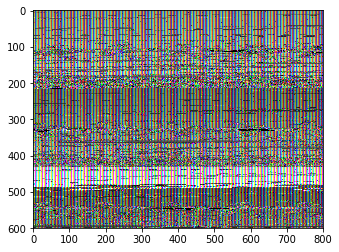

In [23]:
im_i = 0
im = bridge.imgmsg_to_cv2(det[im_i], det[im_i].encoding)
plt.imshow(im)

bag.get_message_count()

In [4]:
images = []
for topic, msg, t in bag.read_messages(topics=['/image_color']):
    images.append(msg)

In [5]:
bb = []
for topic, msg, t in bag.read_messages(topics=['/darknet_ros/bounding_boxes']):
    bb.append(msg)

In [6]:
det = []
for topic, msg, t in bag.read_messages(topics=['/darknet_ros/detection_image']):
    det.append(msg)

In [7]:
len(det[0].data)

1440000

In [15]:
topics = bag.get_type_and_topic_info().topics

In [16]:
topics

{'/base_waypoints': TopicTuple(msg_type='styx_msgs/Lane', message_count=1, connections=1, frequency=None),
 '/darknet_ros/bounding_boxes': TopicTuple(msg_type='darknet_ros_msgs/BoundingBoxes', message_count=4, connections=1, frequency=0.09616985125386171),
 '/darknet_ros/check_for_objects/status': TopicTuple(msg_type='actionlib_msgs/GoalStatusArray', message_count=217, connections=1, frequency=4.995226058088815),
 '/darknet_ros/detection_image': TopicTuple(msg_type='sensor_msgs/Image', message_count=4, connections=1, frequency=0.09616985786900518),
 '/darknet_ros/found_object': TopicTuple(msg_type='std_msgs/Int8', message_count=4, connections=1, frequency=0.0961699659164776),
 '/final_waypoints': TopicTuple(msg_type='styx_msgs/Lane', message_count=1293, connections=1, frequency=22.757345819848023),
 '/rosout': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=2604, connections=6, frequency=3398.9497568881684),
 '/rosout_agg': TopicTuple(msg_type='rosgraph_msgs/Log', message_count=

In [9]:
len(images)

0